## 1. Подключение библиотек

In [1]:
import pandas as pd
import string
import re
import nltk
import pymorphy3

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer


In [17]:
df =pd.read_csv("dataset11.csv")

In [19]:
df.head()

,namecompany,description,rating,activity,date_publish,text_article
0,Timeweb Cloud,Облачная платформа для разработчиков и бизнеса,1572.77,"Веб-разработка, Домены и хостинг, Веб-сервисы",2023-03-27,В своём блоге я рассмотрел устройство и назнач...
1,OTUS,Цифровые навыки от ведущих экспертов,795.43,"Консалтинг и поддержка, Рекрутинг и HR, Произв...",2023-03-27,Автор статьи: Роман КозловРуководитель курса B...
2,Онлайн Патент,Ваш личный патентный офис,220.74,"Консалтинг и поддержка, Веб-сервисы",2023-03-27,Рынок биологически активных добавок(БАД) с каж...
3,OTUS,Цифровые навыки от ведущих экспертов,795.43,"Консалтинг и поддержка, Рекрутинг и HR, Произв...",2023-03-27,Автор статьи: Александр КолесниковВирусный ана...
4,VK,"Технологии, которые объединяют",568.63,"Мобильные технологии, Веб-сервисы, Игры и разв...",2023-03-27,"Всем привет! Меня зовут Артём Пузанков, я DevS..."


### Описание набора данных

__namecompany__ - наименование компании

__description__ - описание компании

__rating__ - рейтинг компании

__activity__ - сфера деятельности компаний

__date_publish__ - дата публикации статьи

__text_article__ - текст статьи

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   namecompany   438 non-null    object 
 1   description   438 non-null    object 
 2   rating        438 non-null    float64
 3   activity      433 non-null    object 
 4   date_publish  438 non-null    object 
 5   text_article  438 non-null    object 
dtypes: float64(1), object(5)
memory usage: 20.7+ KB


## 2. Предварительная обработка данных

1. Перевод всех букв в тексте в нижний регистр
2. Удаление знаков препинания
3. Токенизация по словам
4. Удаление стоп слов
5. Стемминг (приведение слов к нормальной форме)
6. Лемматизация

In [27]:
def remove_punctuation(text): 
    return "".join([ch if ch not in string.punctuation else ' ' for ch in text])

def remove_numbers(text): 
    return ''.join([i if not i.isdigit() else ' ' for i in text])

def remove_multiple_spaces(text): 
    return re.sub(r'\s+', ' ', text, flags=re.I)

st = '❯\xa0—«»'
def remove_othersymbol(text):
    return ''.join([ch if ch not in st else ' ' for ch in text])

In [39]:
df['prep_text'] = [remove_multiple_spaces(remove_numbers(remove_othersymbol(remove_punctuation(text.lower())))) for text in df['text_article']]

In [35]:
df.head()

,namecompany,description,rating,activity,date_publish,text_article,prep_text
0,Timeweb Cloud,Облачная платформа для разработчиков и бизнеса,1572.77,"Веб-разработка, Домены и хостинг, Веб-сервисы",2023-03-27,В своём блоге я рассмотрел устройство и назнач...,в своём блоге я рассмотрел устройство и назнач...
1,OTUS,Цифровые навыки от ведущих экспертов,795.43,"Консалтинг и поддержка, Рекрутинг и HR, Произв...",2023-03-27,Автор статьи: Роман КозловРуководитель курса B...,автор статьи роман козловруководитель курса bi...
2,Онлайн Патент,Ваш личный патентный офис,220.74,"Консалтинг и поддержка, Веб-сервисы",2023-03-27,Рынок биологически активных добавок(БАД) с каж...,рынок биологически активных добавок бад с кажд...
3,OTUS,Цифровые навыки от ведущих экспертов,795.43,"Консалтинг и поддержка, Рекрутинг и HR, Произв...",2023-03-27,Автор статьи: Александр КолесниковВирусный ана...,автор статьи александр колесниковвирусный анал...
4,VK,"Технологии, которые объединяют",568.63,"Мобильные технологии, Веб-сервисы, Игры и разв...",2023-03-27,"Всем привет! Меня зовут Артём Пузанков, я DevS...",всем привет меня зовут артём пузанков я devsec...


In [37]:
df['text_article'][0]

'В своём блоге я рассмотрел устройство и назначение почти всех контроллеров Norvi, обойдены вниманием оказались только контроллеры линейки GSM, имеющие соответствующие модули на своём борту.Как вы понимаете, наличие GSM модуля является существенным дополнением и значительно расширяет возможности контроллера: можно посылать и принимать информационные и управляющие SMS, можно организовать резервный, независимый от вашей IoT инфраструктуры канал связи и т.\xa0д.В этой статье я рассмотрю модель NORVI GSM AE02-V, которая кроме ESP32 и GSM модуля содержит цифровые и аналоговые входы, интерфейс RS485 и прочие возможности, что делает этот контроллер интересным решением для создания ваших проектов по автоматизации.❯Семейство NORVI GSMКонтроллеры линейки NORVI GSM имеют в качестве ядра модуль ESP32-WROOM-32 (Wi-Fi, Bluetooth, 4 МБ EEPROM и т. д.), что позволяет решать довольно тяжёлые вычислительные задачи, поддерживать беспроводную связь и полноценный веб-интерфейс, работать с шифрованием данны

In [33]:
df['prep_text'][0]

'в своём блоге я рассмотрел устройство и назначение почти всех контроллеров norvi обойдены вниманием оказались только контроллеры линейки gsm имеющие соответствующие модули на своём борту как вы понимаете наличие gsm модуля является существенным дополнением и значительно расширяет возможности контроллера можно посылать и принимать информационные и управляющие sms можно организовать резервный независимый от вашей iot инфраструктуры канал связи и т д в этой статье я рассмотрю модель norvi gsm ae v которая кроме esp и gsm модуля содержит цифровые и аналоговые входы интерфейс rs и прочие возможности что делает этот контроллер интересным решением для создания ваших проектов по автоматизации семейство norvi gsmконтроллеры линейки norvi gsm имеют в качестве ядра модуль esp wroom wi fi bluetooth мб eeprom и т д что позволяет решать довольно тяжёлые вычислительные задачи поддерживать беспроводную связь и полноценный веб интерфейс работать с шифрованием данных и т д большинство моделей контролле

In [41]:
russian_stopwords = stopwords.words("russian") 

In [43]:
russian_stopwords 

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [45]:
russian_stopwords.extend(['т.д.', 'т', 'д', 'это','который','с','своём','всем','наш', 'свой']) 

In [47]:
def tokenize(text):
    t = word_tokenize(text)
    tokens = [token for token in t if token not in russian_stopwords]
    text = " ".join(tokens)
    return text

In [49]:
df['tokenize_text'] = [tokenize(text) for text in df['prep_text']]

In [51]:
df.head()

,namecompany,description,rating,activity,date_publish,text_article,prep_text,tokenize_text
0,Timeweb Cloud,Облачная платформа для разработчиков и бизнеса,1572.77,"Веб-разработка, Домены и хостинг, Веб-сервисы",2023-03-27,В своём блоге я рассмотрел устройство и назнач...,в своём блоге я рассмотрел устройство и назнач...,блоге рассмотрел устройство назначение контрол...
1,OTUS,Цифровые навыки от ведущих экспертов,795.43,"Консалтинг и поддержка, Рекрутинг и HR, Произв...",2023-03-27,Автор статьи: Роман КозловРуководитель курса B...,автор статьи роман козловруководитель курса bi...,автор статьи роман козловруководитель курса bi...
2,Онлайн Патент,Ваш личный патентный офис,220.74,"Консалтинг и поддержка, Веб-сервисы",2023-03-27,Рынок биологически активных добавок(БАД) с каж...,рынок биологически активных добавок бад с кажд...,рынок биологически активных добавок бад каждым...
3,OTUS,Цифровые навыки от ведущих экспертов,795.43,"Консалтинг и поддержка, Рекрутинг и HR, Произв...",2023-03-27,Автор статьи: Александр КолесниковВирусный ана...,автор статьи александр колесниковвирусный анал...,автор статьи александр колесниковвирусный анал...
4,VK,"Технологии, которые объединяют",568.63,"Мобильные технологии, Веб-сервисы, Игры и разв...",2023-03-27,"Всем привет! Меня зовут Артём Пузанков, я DevS...",всем привет меня зовут артём пузанков я devsec...,привет зовут артём пузанков devsecops инженер ...


In [53]:
df['tokenize_text'][0]

'блоге рассмотрел устройство назначение контроллеров norvi обойдены вниманием оказались контроллеры линейки gsm имеющие соответствующие модули борту понимаете наличие gsm модуля является существенным дополнением значительно расширяет возможности контроллера посылать принимать информационные управляющие sms организовать резервный независимый вашей iot инфраструктуры канал связи статье рассмотрю модель norvi gsm ae v которая кроме esp gsm модуля содержит цифровые аналоговые входы интерфейс rs прочие возможности делает контроллер интересным решением создания ваших проектов автоматизации семейство norvi gsmконтроллеры линейки norvi gsm имеют качестве ядра модуль esp wroom wi fi bluetooth мб eeprom позволяет решать довольно тяжёлые вычислительные задачи поддерживать беспроводную связь полноценный веб интерфейс работать шифрованием данных большинство моделей контроллеров линейки имеют gsm модуль дисплей кнопки управления передней панели корпуса межблочный интерфейс цифровые опторазвязанные в

In [55]:
stemmer = SnowballStemmer("russian")

stem_list = []
for text in (df['tokenize_text']):
    try:
        tokens = word_tokenize(text)
        res = list()
        for word in tokens:
            p = stemmer.stem(word)
            res.append(p)
        text = " ".join(res)
        stem_list.append(text)
    except Exception as e:
        print(e)
        
df['text_stem'] = stem_list

In [56]:
df.head()

,namecompany,description,rating,activity,date_publish,text_article,prep_text,tokenize_text,text_stem
0,Timeweb Cloud,Облачная платформа для разработчиков и бизнеса,1572.77,"Веб-разработка, Домены и хостинг, Веб-сервисы",2023-03-27,В своём блоге я рассмотрел устройство и назнач...,в своём блоге я рассмотрел устройство и назнач...,блоге рассмотрел устройство назначение контрол...,блог рассмотрел устройств назначен контроллер ...
1,OTUS,Цифровые навыки от ведущих экспертов,795.43,"Консалтинг и поддержка, Рекрутинг и HR, Произв...",2023-03-27,Автор статьи: Роман КозловРуководитель курса B...,автор статьи роман козловруководитель курса bi...,автор статьи роман козловруководитель курса bi...,автор стат рома козловруководител курс bi анал...
2,Онлайн Патент,Ваш личный патентный офис,220.74,"Консалтинг и поддержка, Веб-сервисы",2023-03-27,Рынок биологически активных добавок(БАД) с каж...,рынок биологически активных добавок бад с кажд...,рынок биологически активных добавок бад каждым...,рынок биологическ активн добавок бад кажд год ...
3,OTUS,Цифровые навыки от ведущих экспертов,795.43,"Консалтинг и поддержка, Рекрутинг и HR, Произв...",2023-03-27,Автор статьи: Александр КолесниковВирусный ана...,автор статьи александр колесниковвирусный анал...,автор статьи александр колесниковвирусный анал...,автор стат александр колесниковвирусн аналитик...
4,VK,"Технологии, которые объединяют",568.63,"Мобильные технологии, Веб-сервисы, Игры и разв...",2023-03-27,"Всем привет! Меня зовут Артём Пузанков, я DevS...",всем привет меня зовут артём пузанков я devsec...,привет зовут артём пузанков devsecops инженер ...,привет зовут арт пузанк devsecops инженер депа...


In [59]:
df['text_stem'][0]

'блог рассмотрел устройств назначен контроллер norvi обойд вниман оказа контроллер линейк gsm имеющ соответств модул борт понима налич gsm модул явля существен дополнен значительн расширя возможн контроллер посыла принима информацион управля sms организова резервн независим ваш iot инфраструктур кана связ стат рассмотр модел norvi gsm ae v котор кром esp gsm модул содерж цифров аналогов вход интерфейс rs проч возможн дела контроллер интересн решен создан ваш проект автоматизац семейств norvi гсмконтроллер линейк norvi gsm имеют качеств ядр модул esp wroom wi fi bluetooth мб eeprom позволя реша довольн тяжел вычислительн задач поддержива беспроводн связ полноцен веб интерфейс работа шифрован дан большинств модел контроллер линейк имеют gsm модул диспл кнопк управлен передн панел корпус межблочн интерфейс цифров опторазвяза вход di остальн характеристик отлича состав представлен след таблиц модел ae v имеющ мо распоряжен выдел сер фон мо распоряжен имеет начальн довольн функциональн моде

In [61]:
morph = pymorphy3.MorphAnalyzer(lang='ru')

In [63]:
%%time
lemm_texts_list = []
for text in (df['tokenize_text']):
    try:
        tokens = word_tokenize(text)
        res = list()
        for word in tokens:
            p = morph.parse(word)[0]
            res.append(p.normal_form)
        text = " ".join(res)
        lemm_texts_list.append(text)
    except Exception as e:
        print(e)
    
df['text_lemm'] = lemm_texts_list

CPU times: total: 49.7 s
Wall time: 1min 16s


In [65]:
df.head()

,namecompany,description,rating,activity,date_publish,text_article,prep_text,tokenize_text,text_stem,text_lemm
0,Timeweb Cloud,Облачная платформа для разработчиков и бизнеса,1572.77,"Веб-разработка, Домены и хостинг, Веб-сервисы",2023-03-27,В своём блоге я рассмотрел устройство и назнач...,в своём блоге я рассмотрел устройство и назнач...,блоге рассмотрел устройство назначение контрол...,блог рассмотрел устройств назначен контроллер ...,блог рассмотреть устройство назначение контрол...
1,OTUS,Цифровые навыки от ведущих экспертов,795.43,"Консалтинг и поддержка, Рекрутинг и HR, Произв...",2023-03-27,Автор статьи: Роман КозловРуководитель курса B...,автор статьи роман козловруководитель курса bi...,автор статьи роман козловруководитель курса bi...,автор стат рома козловруководител курс bi анал...,автор статья роман козловруководитель курс bi ...
2,Онлайн Патент,Ваш личный патентный офис,220.74,"Консалтинг и поддержка, Веб-сервисы",2023-03-27,Рынок биологически активных добавок(БАД) с каж...,рынок биологически активных добавок бад с кажд...,рынок биологически активных добавок бад каждым...,рынок биологическ активн добавок бад кажд год ...,рынок биологически активный добавка бад каждый...
3,OTUS,Цифровые навыки от ведущих экспертов,795.43,"Консалтинг и поддержка, Рекрутинг и HR, Произв...",2023-03-27,Автор статьи: Александр КолесниковВирусный ана...,автор статьи александр колесниковвирусный анал...,автор статьи александр колесниковвирусный анал...,автор стат александр колесниковвирусн аналитик...,автор статья александр колесниковвирусный анал...
4,VK,"Технологии, которые объединяют",568.63,"Мобильные технологии, Веб-сервисы, Игры и разв...",2023-03-27,"Всем привет! Меня зовут Артём Пузанков, я DevS...",всем привет меня зовут артём пузанков я devsec...,привет зовут артём пузанков devsecops инженер ...,привет зовут арт пузанк devsecops инженер депа...,привет звать артём пузанок devsecops инженер д...


In [67]:
df['text_lemm'][0]

'блог рассмотреть устройство назначение контроллер norvi обойти внимание оказаться контроллер линейка gsm иметь соответствующий модуль борт понимать наличие gsm модуль являться существенный дополнение значительно расширять возможность контроллер посылать принимать информационный управлять sms организовать резервный независимый ваш iot инфраструктура канал связь статья рассмотреть модель norvi gsm ae v который кроме esp gsm модуль содержать цифровой аналоговый вход интерфейс rs прочий возможность делать контроллер интересный решение создание ваш проект автоматизация семейство norvi gsmконтроллер линейка norvi gsm иметь качество ядро модуль esp wroom wi fi bluetooth мб eeprom позволять решать довольно тяжёлый вычислительный задача поддерживать беспроводный связь полноценный веб интерфейс работать шифрование данные большинство модель контроллер линейка иметь gsm модуль дисплей кнопка управление передний панель корпус межблочный интерфейс цифровой опторазвязать вход di остальной характерис

In [69]:
df['text_lemm'] = [tokenize(text) for text in df['text_lemm']]

In [71]:
df.head()

,namecompany,description,rating,activity,date_publish,text_article,prep_text,tokenize_text,text_stem,text_lemm
0,Timeweb Cloud,Облачная платформа для разработчиков и бизнеса,1572.77,"Веб-разработка, Домены и хостинг, Веб-сервисы",2023-03-27,В своём блоге я рассмотрел устройство и назнач...,в своём блоге я рассмотрел устройство и назнач...,блоге рассмотрел устройство назначение контрол...,блог рассмотрел устройств назначен контроллер ...,блог рассмотреть устройство назначение контрол...
1,OTUS,Цифровые навыки от ведущих экспертов,795.43,"Консалтинг и поддержка, Рекрутинг и HR, Произв...",2023-03-27,Автор статьи: Роман КозловРуководитель курса B...,автор статьи роман козловруководитель курса bi...,автор статьи роман козловруководитель курса bi...,автор стат рома козловруководител курс bi анал...,автор статья роман козловруководитель курс bi ...
2,Онлайн Патент,Ваш личный патентный офис,220.74,"Консалтинг и поддержка, Веб-сервисы",2023-03-27,Рынок биологически активных добавок(БАД) с каж...,рынок биологически активных добавок бад с кажд...,рынок биологически активных добавок бад каждым...,рынок биологическ активн добавок бад кажд год ...,рынок биологически активный добавка бад каждый...
3,OTUS,Цифровые навыки от ведущих экспертов,795.43,"Консалтинг и поддержка, Рекрутинг и HR, Произв...",2023-03-27,Автор статьи: Александр КолесниковВирусный ана...,автор статьи александр колесниковвирусный анал...,автор статьи александр колесниковвирусный анал...,автор стат александр колесниковвирусн аналитик...,автор статья александр колесниковвирусный анал...
4,VK,"Технологии, которые объединяют",568.63,"Мобильные технологии, Веб-сервисы, Игры и разв...",2023-03-27,"Всем привет! Меня зовут Артём Пузанков, я DevS...",всем привет меня зовут артём пузанков я devsec...,привет зовут артём пузанков devsecops инженер ...,привет зовут арт пузанк devsecops инженер депа...,привет звать артём пузанок devsecops инженер д...


# Облако слов

In [27]:
pip install WordCloud

     -------------------------------------- 300.0/300.0 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [73]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
# Получение текстовой строки из списка слов
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus

# Получение списка всех слов в корпусе
def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    return corpus

# Получение облака слов
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud

<Axes: >

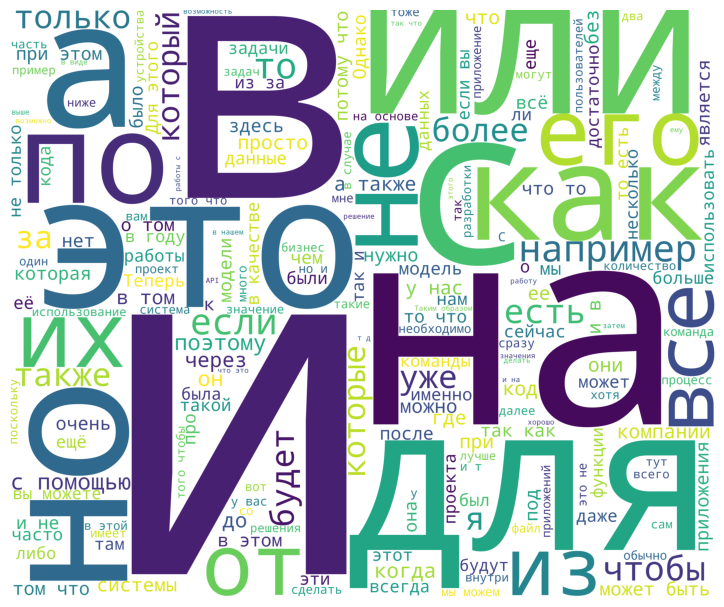

In [77]:
corpus = get_corpus(df['text_article'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

<Axes: >

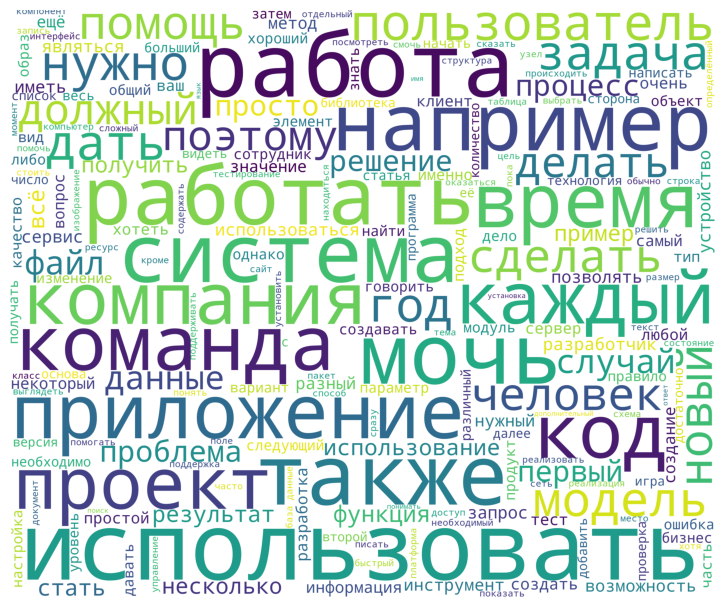

In [79]:
corpus = get_corpus(df['text_lemm'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

In [83]:
# Получение облака слов
def get_wordCloud2(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(corpus)
    return wordCloud

<Axes: >

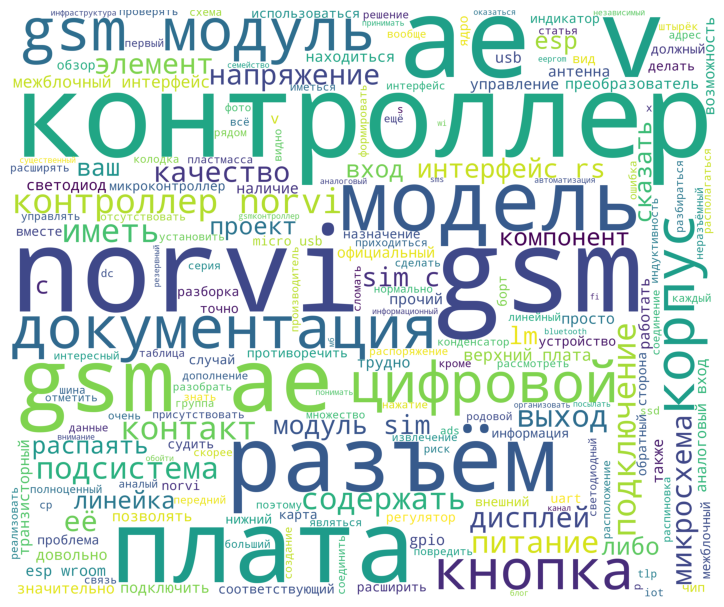

In [85]:
corpus = df['text_lemm'][0]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

<Axes: >

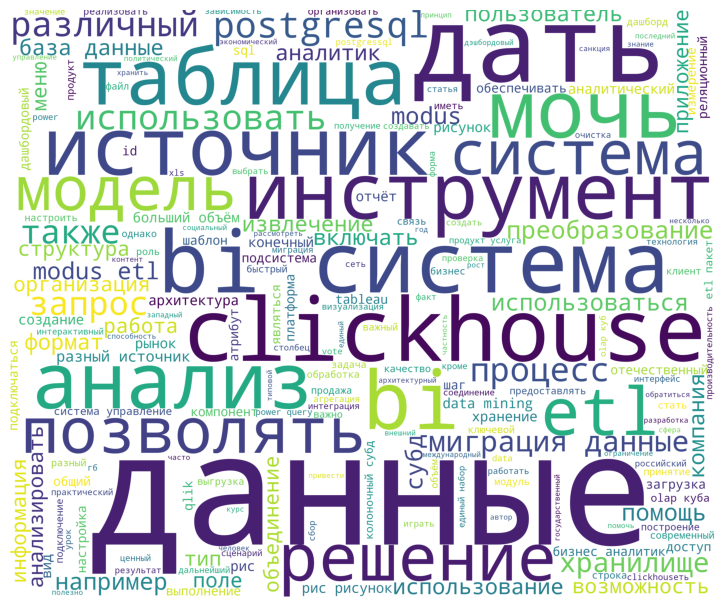

In [86]:
corpus = df['text_lemm'][1]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

In [89]:
df['text_lemm'][1]

'автор статья роман козловруководитель курс bi аналитикассылка автор krv последний год напрячь экономический политический ситуация связь усиление международный санкция привести уход многий зарубежный компания рынок бизнес аналитический система ограничение доступ продукт услуга частность рынок бизнес аналитик столкнуться серьёзный вызов многие российский предприятие организация стать ограничить использование западный bi система однако трудность послужить стимул рост интерес отечественный разработка сфера бизнес аналитик использование отечественный bi система особенно полезно компания работать отрасль связанный государственный заказ оборона безопасность также мочь помочь компания сталкиваться ограничение использование западный bi система политический экономический санкция статья обратиться практический опыт использование отечественный бизнес аналитический система modus bi решение нетривиальный задача миграция данные субд postgressql субд clickhouse изучение отечественный bi система предо

<Axes: >

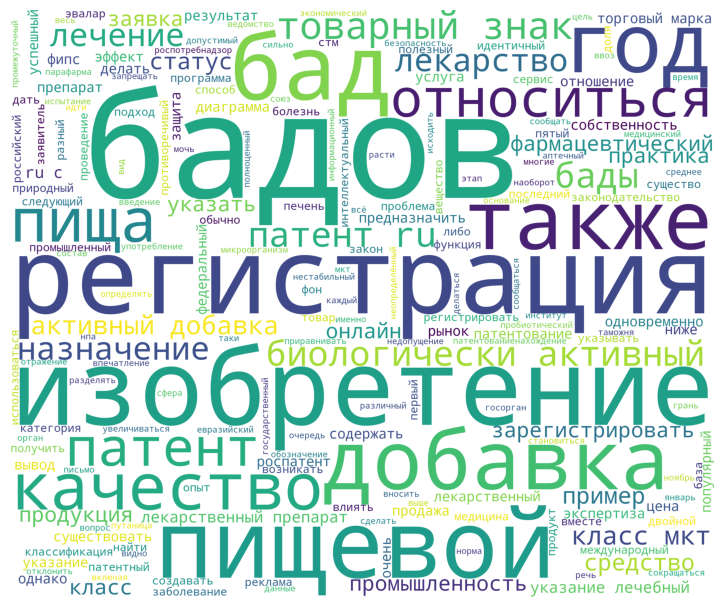

In [88]:
corpus = df['text_lemm'][2]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

In [90]:
df['text_lemm'][2]

'рынок биологически активный добавка бад каждый год увеличиваться цена препарат расти вместе нестабильный статус бадов среднее пища лекарство вносить путаница многие сфера включая патентование вопрос возникать отношение регистрация товарный знак обозначение данные вещество существовать успешный пример регистрация качество полноценный изобретение диаграмма выше содержать дать доля бадов продажа парафарма медицинский средство статус лекарственный средство видно именно статус добавка становиться всё популярный доля аптечный продажа также сокращаться таки бады пищевой фармацевтический промышленность российский законодательство бады грань пищевой промышленность фармацевтический разный государственный орган ведомство нпа содержать противоречивый указание роспотребнадзор исходить норма евразийский экономический союз российский законодательство год сделать вывод бады относиться пищевой продукция федеральный закон № качество безопасность пищевой продукт январь год определять бад природный идент

# Векторизация текстовых данных

Векторизация текста или преобразование текста в численную форму. Алгоритмы машинного обучения не умеют работать с текстом, поэтому необходимо превратить текст в цифры.

1. Прямое кодирование (one-hot encoding) 

Прямое кодирование (one-hot encoding) считается самым простым способом преобразования токенов в тензоры и выполняется следующим образом:

1. каждый токен представляет бинарный вектор (значения 0 или 1);
2. единица ставится тому элементу, который соответствует номеру токена в словаре.

Проблемой прямого кодирования является размерность. 

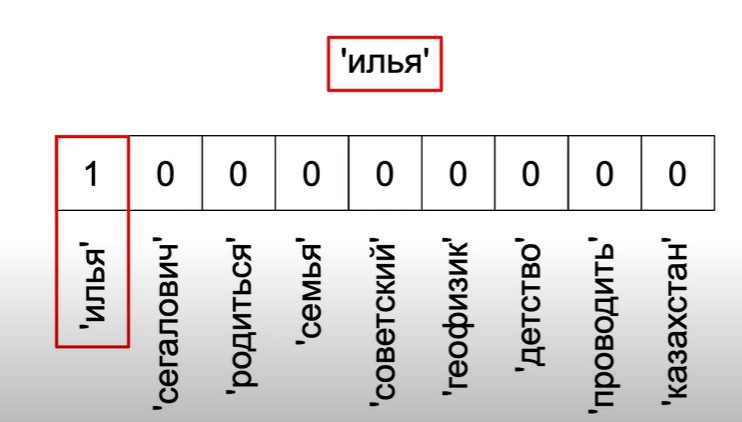

2. Bag of words

В отличие от прямого кодирования, мешок слов (Bag of words) выделяет вектору весь документ, и каждый элемент кодируется 1 по порядку следования слов в словаре.

Bag of words решает проблему размерности по одной оси. Количество строк определяется количеством документов. Однако, этот метод не учитывает важность того или иного токена, ведь одно слово может повторятся по несколько раз.

__Мешок слов__ - решает проблему размерности по одной оси. Количество строк определяется количеством документов. Однако, этот метод не учитывает важность того или иного токена, ведь одно слово может повторятся по несколько раз. В пакете scikit-learn есть модуль CountVectorizer, который преобразовывает входной текст в матрицу, значениями которой являются количества вхождения данного ключа(слова) в текст. Таким образом, мы получим матрицу, размерность которой будет равна количеству всех слов, умноженных на количество документов. И элементами матрицы будут числа, которые означают, сколько раз всего слово встретилось в тексте.

In [95]:
from sklearn.feature_extraction.text import CountVectorizer

In [97]:
df['text_lemm'][0]

'блог рассмотреть устройство назначение контроллер norvi обойти внимание оказаться контроллер линейка gsm иметь соответствующий модуль борт понимать наличие gsm модуль являться существенный дополнение значительно расширять возможность контроллер посылать принимать информационный управлять sms организовать резервный независимый ваш iot инфраструктура канал связь статья рассмотреть модель norvi gsm ae v кроме esp gsm модуль содержать цифровой аналоговый вход интерфейс rs прочий возможность делать контроллер интересный решение создание ваш проект автоматизация семейство norvi gsmконтроллер линейка norvi gsm иметь качество ядро модуль esp wroom wi fi bluetooth мб eeprom позволять решать довольно тяжёлый вычислительный задача поддерживать беспроводный связь полноценный веб интерфейс работать шифрование данные большинство модель контроллер линейка иметь gsm модуль дисплей кнопка управление передний панель корпус межблочный интерфейс цифровой опторазвязать вход di остальной характеристика отл

In [99]:
vectorizer = CountVectorizer()
vectorizer.fit(df['text_lemm'])

CountVectorizer()

In [101]:
print(vectorizer.vocabulary_)

{'блог': 16056, 'рассмотреть': 33935, 'устройство': 39132, 'назначение': 26026, 'контроллер': 23438, 'norvi': 8612, 'обойти': 27618, 'внимание': 17100, 'оказаться': 28059, 'линейка': 24259, 'gsm': 5317, 'иметь': 21656, 'соответствующий': 36349, 'модуль': 25517, 'борт': 16183, 'понимать': 31128, 'наличие': 26104, 'являться': 41247, 'существенный': 37350, 'дополнение': 19835, 'значительно': 21328, 'расширять': 34036, 'возможность': 17222, 'посылать': 31429, 'принимать': 32235, 'информационный': 21984, 'управлять': 38966, 'sms': 11861, 'организовать': 28385, 'резервный': 34230, 'независимый': 26609, 'ваш': 16534, 'iot': 6253, 'инфраструктура': 21994, 'канал': 22392, 'связь': 35175, 'статья': 36894, 'модель': 25486, 'ae': 201, 'кроме': 23871, 'esp': 3948, 'содержать': 36232, 'цифровой': 40185, 'аналоговый': 15124, 'вход': 17631, 'интерфейс': 21932, 'rs': 10951, 'прочий': 33088, 'делать': 19162, 'интересный': 21910, 'решение': 34495, 'создание': 36256, 'проект': 32635, 'автоматизация': 1473

In [103]:
vectorizer = CountVectorizer(analyzer='word', stop_words=russian_stopwords, ngram_range=(1, 3), min_df=2)
count_matrix = vectorizer.fit_transform(df['text_lemm'])

In [105]:
count_matrix.shape

(438, 61806)

In [107]:
vectorizer.get_feature_names_out()[45000:46000]

array(['процессор оперативный', 'процессор оперативный память',
       'процессор память', 'процессор получить',
       'процессор получить проектный', 'процессорный',
       'процессорный время', 'проч', 'прочее', 'прочее мочь', 'прочесть',
       'прочий', 'прочий интересный', 'прочий интересный штука',
       'прочий использовать', 'прочий нюанс', 'прочий опция',
       'прочий радость', 'прочий сложный', 'прочитать',
       'прочитать документация', 'прочитать запомнить', 'прочитать книга',
       'прочитать ограничение', 'прочитать самый', 'прочитать сообщение',
       'прочитать статья', 'прочить', 'прочно', 'прочность', 'прочный',
       'прочтение', 'прочувствовать', 'прошедшее', 'прошедшее время',
       'прошедшее год', 'прошедший', 'прошествие', 'прошивка',
       'прошивка микроконтроллер', 'прошивка определить',
       'прошивка устройство', 'прошить', 'прошлое', 'прошлое год',
       'прошлое использование', 'прошлое использование iso', 'прошлый',
       'прошлый век', 'п

In [119]:
vectorizer.get_feature_names_out()[3087]

'gsm'

In [121]:
vectorizer.get_feature_names_out()[25765]

'контроллер'

In [109]:
print(count_matrix)

  (0, 10244)	1
  (0, 47295)	2
  (0, 58075)	3
  (0, 29458)	3
  (0, 25765)	29
  (0, 32805)	1
  (0, 12235)	1
  (0, 33834)	1
  (0, 26685)	5
  (0, 3087)	33
  (0, 21267)	8
  (0, 52704)	3
  (0, 28449)	16
  (0, 10525)	3
  (0, 39921)	1
  (0, 29642)	4
  (0, 61549)	2
  (0, 54749)	1
  (0, 17726)	2
  (0, 20583)	4
  (0, 47441)	2
  (0, 12450)	4
  (0, 40689)	1
  (0, 42743)	1
  (0, 22105)	1
  :	:
  (437, 34722)	1
  (437, 20488)	2
  (437, 56674)	1
  (437, 22215)	1
  (437, 43292)	1
  (437, 43293)	1
  (437, 11900)	1
  (437, 57936)	1
  (437, 16946)	1
  (437, 42391)	1
  (437, 39565)	1
  (437, 53495)	1
  (437, 11826)	1
  (437, 42392)	1
  (437, 12589)	1
  (437, 31444)	1
  (437, 20047)	1
  (437, 17920)	1
  (437, 20885)	1
  (437, 20147)	1
  (437, 59274)	1
  (437, 39160)	1
  (437, 23085)	1
  (437, 33274)	1
  (437, 53222)	1


3. TF-IDF

TF-IDF (от англ. TF — term frequency, IDF — inverse document frequency) — статистическая мера, используемая для оценки важности слова в контексте документа, являющегося частью коллекции документов или корпуса. Вес некоторого слова пропорционален частоте употребления этого слова в документе и обратно пропорционален частоте употребления слова во всех документах коллекции.

TF-IDF состоит из двух компонентов: Term Frequency (частотность слова в документе) и Inverse Document Frequency (инверсия частоты документа). Они считаются следующим образом:

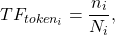

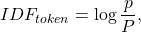

где n_i — сколько раз встречается токен в i-ом документе,  
N_i — общее количество токенов в i-ом документе,   
p — количество документов, в которых встречается токен,   
P — общее количеств документов.   
В конечном счете, TF-IDF – это произведение TF на IDF

 В TF-IDF редкие слова и слова, которые встречаются во всех документах, несут мало информации. 

__TF-IDF__ - это способ векторизации текста, отражающий важность слова в документе, а не только частоту его появления. В тексте большого объема некоторые слова могут присутствовать очень часто, но при этом не нести никакой значимой информации о фактическом содержании текста (документа). Если такие данные передавать непосредственно классификатору, то такие частые термины могут затенять частоты более редких, но при этом более интересных терминов. Для того, чтобы этого избежать, достаточно разделить количество употреблений каждого слова в документе на общее количество слов в документе, это есть TF — частота термина. Термин IDF (inverse document frequency) обозначает обратную частоту термина (инверсия частоты) с которой некоторое слово встречается в документах. IDF позволяет измерить непосредственную важность термина.


In [123]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [125]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000,
                                 min_df=0.01, stop_words=russian_stopwords,
                                 ngram_range=(1,3))

In [127]:
%%time
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text_lemm'])

CPU times: total: 3.59 s
Wall time: 6.74 s


In [128]:
tfidf_matrix.shape

(438, 10000)

In [131]:
tfidf_vectorizer.get_feature_names_out()[:100]

array(['ab', 'about', 'above', 'ac', 'access', 'account', 'accuracy',
       'action', 'actions', 'active', 'active directory', 'activity',
       'ad', 'adam', 'add', 'address', 'admin', 'adobe', 'advanced',
       'aes', 'af', 'after', 'age', 'agent', 'agile', 'ai', 'ajax', 'aka',
       'alert', 'aliexpress', 'all', 'allow', 'alpha', 'alpine', 'also',
       'alt', 'always', 'am', 'amazon', 'amd', 'an', 'analysis',
       'analystкурс', 'analystкурс математик',
       'analystкурс математик data', 'analytics', 'and', 'and the',
       'android', 'android ios', 'android разработчикjava',
       'android разработчикjava профессия', 'angular', 'annotation',
       'another', 'ansible', 'answer', 'any', 'apache', 'apache kafka',
       'api', 'api позволять', 'apiversion', 'app', 'append', 'apple',
       'application', 'applications', 'applied', 'apply', 'apps', 'apt',
       'ar', 'architect', 'architecture', 'arduino', 'are', 'args', 'arm',
       'arr', 'array', 'arxiv', 'as', 'asci

In [135]:
tfidf_vectorizer.get_feature_names_out()[1253]

'sim карта'

In [139]:
tfidf_vectorizer.get_feature_names_out()[5866]

'официальный документация'

In [133]:
print(tfidf_matrix)

  (0, 8936)	0.017094516609518867
  (0, 2201)	0.01892062986156212
  (0, 1830)	0.011880220186908014
  (0, 5214)	0.015414334927271772
  (0, 4879)	0.015414334927271772
  (0, 4818)	0.014799999982154434
  (0, 6447)	0.01836956784323826
  (0, 7797)	0.01589168656017877
  (0, 2203)	0.01589168656017877
  (0, 6168)	0.01836956784323826
  (0, 5407)	0.04693514693307072
  (0, 2765)	0.011132753174293979
  (0, 7708)	0.03784125972312424
  (0, 5659)	0.01836956784323826
  (0, 8871)	0.015414334927271772
  (0, 3480)	0.01789221621033126
  (0, 9134)	0.017094516609518867
  (0, 5915)	0.01836956784323826
  (0, 2141)	0.030395224779948708
  (0, 8528)	0.01589168656017877
  (0, 1253)	0.05241348668920049
  (0, 3009)	0.013413805277119283
  (0, 5866)	0.0512835498285566
  (0, 1953)	0.015414334927271772
  (0, 1779)	0.01836956784323826
  :	:
  (437, 9977)	0.02477013158642856
  (437, 4010)	0.006447108588897522
  (437, 8125)	0.018102262492862193
  (437, 8481)	0.04668385837106245
  (437, 3718)	0.02984399310982835
  (437, 2827